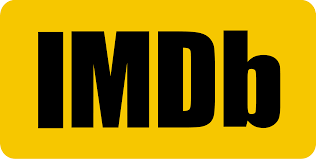

<h1> <center>Predicting US Movies Gross Using Regression </center> </h1> 

> Prediction of the correct box office gross is essential for the movie industry and decreasing market risk. The success and failure of the movie depend on movie-related variables. Therefore, the goal of this project is to create a machine learning model that will predict the US movies gross taking into consideration many features. The features include IMDb rating, certification of movie, number of votes, release year, movie duration, and metascore. Exploring data scraped from the IMDb websites to see which features affect the prediction the most.

## Table of content: 

  * [Import Libraries](#first)
  * [Data Exploring](#second)
  * [Data Cleaning](#Third)
  * [Data Analysis and Visulizations](#Forth)
  * [Feature Engneering](#Fifth)
  * [Linear Regression Models](#sixth)
  * [Conclusion](#seventh)

## Importing libreries: <a class="anchor" id="first"></a>

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
from datetime import datetime

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge ,RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, scale
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor

In [3]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## EDA

### Data Exploring: <a class="anchor" id="second"></a>

In [4]:
df_movies = pd.read_csv('The_imdb_dataset.csv')

In [5]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie          6000 non-null   object 
 1   year           6000 non-null   object 
 2   time_minute    6000 non-null   object 
 3   imdb_rating    6000 non-null   float64
 4   metascore      6000 non-null   object 
 5   vote           6000 non-null   object 
 6   gross_earning  6000 non-null   object 
 7   certificates   6000 non-null   object 
 8   genres         6000 non-null   object 
dtypes: float64(1), object(8)
memory usage: 422.0+ KB


In [6]:
df_movies.head()

,Movie,year,time_minute,imdb_rating,metascore,vote,gross_earning,certificates,genres
0,No Time to Die,(2021),163 min,7.6,68,"107,163",-,PG-13,"\nAction, Adventure, Thriller"
1,The Guilty,(2021),90 min,6.3,63,"64,375",-,R,"\nCrime, Drama, Thriller"
2,The Many Saints of Newark,(2021),120 min,6.4,60,"27,145",-,R,"\nCrime, Drama"
3,Venom: Let There Be Carnage,(2021),97 min,6.4,47,"30,443",-,PG-13,"\nAction, Adventure, Sci-Fi"
4,Dune,(2021),155 min,8.3,75,"84,636",-,PG-13,"\nAction, Adventure, Drama"


### Data Cleaning: <a class="anchor" id="Third"></a>

In [7]:
df_movies['time_minute'] = df_movies['time_minute'].str.replace("min",'')

In [8]:
df_movies['time_minute'] = df_movies['time_minute'].astype(int)
df_movies['vote'] = df_movies['vote'].str.replace(",",'')
df_movies['vote'] = df_movies['vote'].astype(int)
df_movies['vote'] = df_movies['vote'].astype(int)
df_movies['genres'] = df_movies['genres'].str.replace("\n",'')

In [9]:
df_movies.loc[df_movies['metascore'] == '-']

,Movie,year,time_minute,imdb_rating,metascore,vote,gross_earning,certificates,genres
79,Trick 'r Treat,(2007),82,6.8,-,86032,-,R,"Comedy, Horror"
330,Death Proof,(2007),127,7.0,-,279710,-,TV-MA,"Action, Thriller"
453,The Babysitter,(I) (2017),85,6.3,-,82845,-,TV-MA,"Comedy, Horror"
483,Good Boys,(I) (2019),90,6.7,-,69025,$69.06M,R,"Adventure, Comedy"
525,The Empty Man,(2020),137,6.1,-,19528,-,R,"Horror, Mystery, Thriller"
...,...,...,...,...,...,...,...,...,...
5846,A Goofy Movie,(1995),78,6.9,-,49792,$35.35M,G,"Animation, Adventure, Comedy"
5915,Laura,(1944),88,8.0,-,44957,$4.36M,Passed,"Drama, Film-Noir, Mystery"
5923,The Ghost and Mrs. Muir,(1947),104,7.9,-,17977,-,Not Rated,"Comedy, Drama, Fantasy"
5938,The Little Shop of Horrors,(1960),72,6.3,-,17448,$1.40M,Not Rated,"Comedy, Horror"


In [10]:
df_movies.loc[df_movies['gross_earning'] == '-']

,Movie,year,time_minute,imdb_rating,metascore,vote,gross_earning,certificates,genres
0,No Time to Die,(2021),163,7.6,68,107163,-,PG-13,"Action, Adventure, Thriller"
1,The Guilty,(2021),90,6.3,63,64375,-,R,"Crime, Drama, Thriller"
2,The Many Saints of Newark,(2021),120,6.4,60,27145,-,R,"Crime, Drama"
3,Venom: Let There Be Carnage,(2021),97,6.4,47,30443,-,PG-13,"Action, Adventure, Sci-Fi"
4,Dune,(2021),155,8.3,75,84636,-,PG-13,"Action, Adventure, Drama"
...,...,...,...,...,...,...,...,...,...
5940,Earthquake Bird,(2019),107,5.9,51,13736,-,R,"Crime, Drama, Mystery"
5960,Da 5 Bloods,(2020),154,6.5,82,47925,-,R,"Adventure, Drama, War"
5979,Roman Holiday,(1953),118,8.0,78,133640,-,Passed,"Comedy, Romance"
5982,My Mom's New Boyfriend,(2008),119,5.3,-,11483,-,PG-13,"Comedy, Crime, Romance"


In [11]:
df_movies['metascore'] =df_movies['metascore'].astype(str).str.replace("-", "0")

In [12]:
df_movies['metascore'] = df_movies['metascore'].astype(int)

In [13]:
df_movies_new=df_movies.iloc[0:3000]

In [14]:
df_movies_new.shape

(3000, 9)

In [15]:
df_movies_new['year'] = df_movies_new['year'].str.strip('()').astype(str)
df_movies_new['year'] =df_movies_new['year'].astype(str).str.replace("I", "")
df_movies_new['year'] =df_movies_new['year'].astype(str).str.replace("(", "")
df_movies_new['year'] =df_movies_new['year'].astype(str).str.replace(")","")
df_movies_new['year'] =df_movies_new['year'].astype(str).str.replace("X","")
df_movies_new['year'] =df_movies_new['year'].astype(str).str.replace("V","")

df_movies_new['year'] =df_movies_new['year'].astype(int)

In [16]:
df_movies_new['year'].dtype

dtype('int64')

In [17]:
df_movies_new['gross_earning'] = df_movies_new['gross_earning'].str.strip('$').astype(str)
df_movies_new['gross_earning'] =df_movies_new['gross_earning'].astype(str).str.replace("-", "0")

In [18]:
df_movies_new['gross_earning']

0             0
1             0
2             0
3             0
4             0
         ...   
2995     37.31M
2996      2.81M
2997      0.01M
2998     80.01M
2999    113.09M
Name: gross_earning, Length: 3000, dtype: object

In [19]:
def text_to_num(text, bad_data_val = 0):
    d = {
        'K': 1000,
        'M': 1000000,
        'B': 1000000000
    }
    if not isinstance(text, str):
        # Non-strings are bad are missing data in poster's submission
        return bad_data_val

    elif text[-1] in d:
        # separate out the K, M, or B
        num, magnitude = text[:-1], text[-1]
        return int(float(num) * d[magnitude])
    else:
        return float(text)
    

In [20]:
df_movies_new['gross_earning'] = df_movies_new['gross_earning'].apply(text_to_num)

In [21]:
df_movies_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie          3000 non-null   object 
 1   year           3000 non-null   int64  
 2   time_minute    3000 non-null   int64  
 3   imdb_rating    3000 non-null   float64
 4   metascore      3000 non-null   int64  
 5   vote           3000 non-null   int64  
 6   gross_earning  3000 non-null   float64
 7   certificates   3000 non-null   object 
 8   genres         3000 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 211.1+ KB


In [22]:
df_movies_new = df_movies_new[df_movies_new.year != 2021]

In [23]:
df_movies_new.shape

(2904, 9)

In [24]:
df_movies_new.drop_duplicates(subset=["Movie", "year", "time_minute"], inplace=True)

In [25]:
df_movies_new.shape

(2904, 9)

In [26]:
df_movies_new.loc[df_movies_new['metascore'] == 0]

,Movie,year,time_minute,imdb_rating,metascore,vote,gross_earning,certificates,genres
79,Trick 'r Treat,2007,82,6.8,0,86032,0.0,R,"Comedy, Horror"
330,Death Proof,2007,127,7.0,0,279710,0.0,TV-MA,"Action, Thriller"
453,The Babysitter,2017,85,6.3,0,82845,0.0,TV-MA,"Comedy, Horror"
483,Good Boys,2019,90,6.7,0,69025,69060000.0,R,"Adventure, Comedy"
525,The Empty Man,2020,137,6.1,0,19528,0.0,R,"Horror, Mystery, Thriller"
...,...,...,...,...,...,...,...,...,...
2846,A Goofy Movie,1995,78,6.9,0,49792,35350000.0,G,"Animation, Adventure, Comedy"
2915,Laura,1944,88,8.0,0,44957,4360000.0,Passed,"Drama, Film-Noir, Mystery"
2923,The Ghost and Mrs. Muir,1947,104,7.9,0,17976,0.0,Not Rated,"Comedy, Drama, Fantasy"
2938,The Little Shop of Horrors,1960,72,6.3,0,17448,1400000.0,Not Rated,"Comedy, Horror"


> Checking for outliers in order to find the best way to replace zero values in metascore & gross_earning


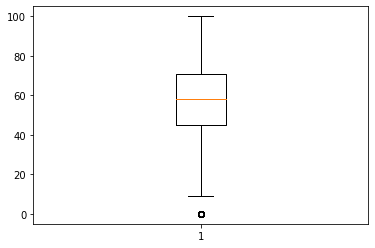

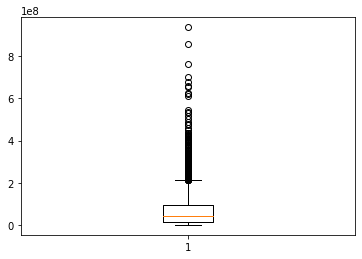

In [27]:
plt.boxplot(df_movies_new['metascore']) 
plt.show()
plt.boxplot(df_movies_new['gross_earning'])
plt.show()

In [28]:
print(df_movies_new['metascore'].mean())

57.09607438016529


In [29]:
df_movies_new['metascore']=df_movies_new['metascore'].replace(0,df_movies_new['metascore'].mean())

In [30]:

print(df_movies_new['gross_earning'].median())

41435000.0


In [31]:
df_movies_new['gross_earning']=df_movies_new['gross_earning'].replace(0,df_movies_new['gross_earning'].median())

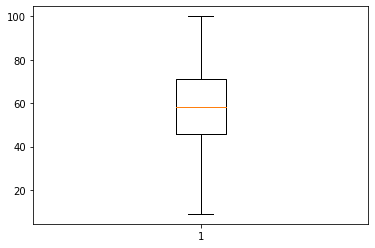

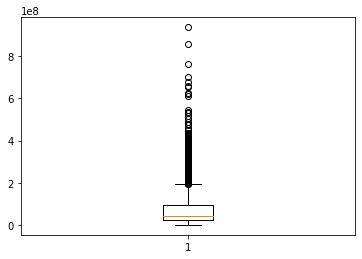

In [32]:
plt.boxplot(df_movies_new['metascore']) 
plt.show()
plt.boxplot(df_movies_new['gross_earning'])
plt.show()

In [33]:
print(df_movies_new['gross_earning'].describe())

count    2.904000e+03
mean     7.383270e+07
std      8.592362e+07
min      1.000000e+04
25%      2.497250e+07
50%      4.144750e+07
75%      9.206750e+07
max      9.366600e+08
Name: gross_earning, dtype: float64


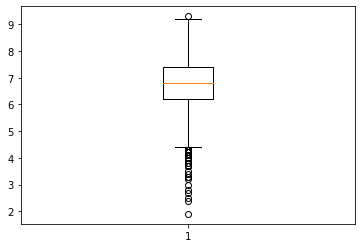

In [34]:
plt.boxplot(df_movies_new['imdb_rating'])
plt.show()

In [35]:
df_movies_new.isnull().values.any()

False

## Data Analysis and Visulizations: <a class="anchor" id="Forth"></a>

In [36]:
df_subset1=df_movies_new[['Movie','gross_earning','time_minute', 'metascore','vote']]
df_subset1.head(10)

,Movie,gross_earning,time_minute,metascore,vote
8,Spectre,200070000.0,148,60.0,407514
9,Casino Royale,167450000.0,144,80.0,613873
12,The Night House,41435000.0,107,68.0,14936
13,Venom,213520000.0,112,35.0,414787
14,Skyfall,304360000.0,143,81.0,658977
16,Hocus Pocus,39510000.0,96,43.0,110741
17,Dune,30930000.0,137,41.0,142157
18,Quantum of Solace,168370000.0,106,58.0,424649
21,Halloween,47000000.0,91,87.0,248788
24,Promising Young Woman,41435000.0,113,73.0,132936


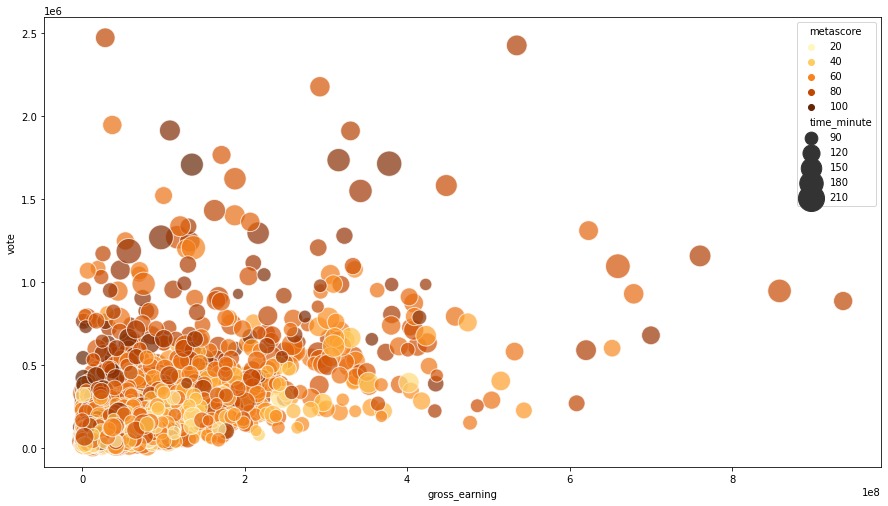

In [72]:
sns.scatterplot(data=df_subset1, x="gross_earning", y="vote",hue='metascore' ,size='time_minute',alpha=0.7, sizes=(50, 800), palette='YlOrBr')

# show the graph
# figure size in inches
sns.color_palette("YlOrBr", as_cmap=True)
rcParams['figure.figsize'] = 15, 8.27
plt.show()

In [38]:
df_subset2 = df_movies_new.groupby(['Movie'])[['vote']].sum().sort_values(by ='vote', ascending = False).reset_index()
df_subset2.head(21)

,Movie,vote
0,The Shawshank Redemption,2474122
1,The Dark Knight,2428117
2,Inception,2178860
3,Fight Club,1948261
4,Pulp Fiction,1915230
5,Forrest Gump,1912582
6,The Matrix,1767660
7,The Lord of the Rings: The Fellowship of the Ring,1736338
8,The Lord of the Rings: The Return of the King,1715054
9,The Godfather,1709439


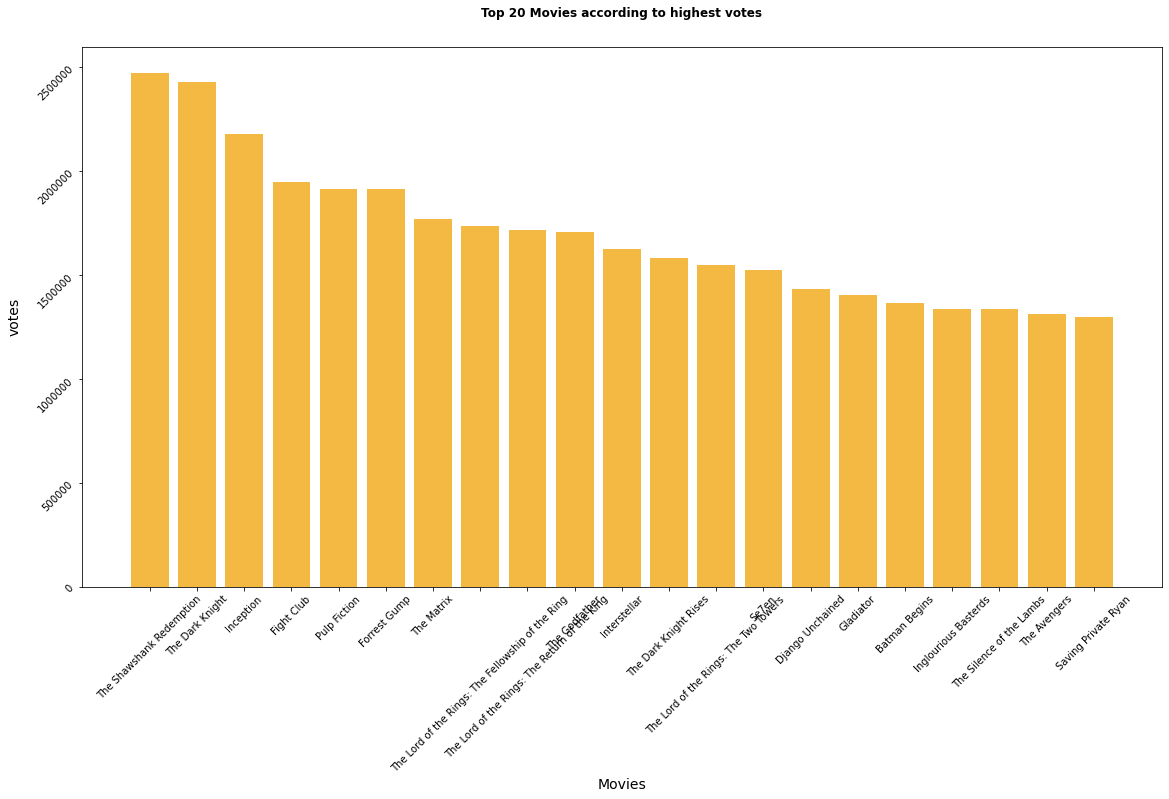

In [39]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,0.5])
fig.set_figwidth(30)
fig.set_figheight(15)
ax.bar(df_subset2['Movie'][:21], df_subset2['vote'][:21].sort_values(ascending=False), color ='#F4B942')
ax.set_title('Top 20 Movies according to highest votes',  pad=30, fontweight='bold')
ax.set_ylabel('votes', labelpad=15, fontsize = 14)
ax.set_xlabel('Movies', fontsize = 14)
ax.tick_params(labelrotation=45)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

In [40]:
df_movies_new.corr()

,year,time_minute,imdb_rating,metascore,vote,gross_earning
year,1.000000,-0.018186,-0.267468,-0.192239,0.024204,0.114754
time_minute,-0.018186,1.000000,0.386217,0.270504,0.360767,0.252388
imdb_rating,-0.267468,0.386217,1.000000,0.705041,0.508482,0.181420
metascore,-0.192239,0.270504,0.705041,1.000000,0.333760,0.141814
vote,0.024204,0.360767,0.508482,0.333760,1.000000,0.548014
gross_earning,0.114754,0.252388,0.181420,0.141814,0.548014,1.000000


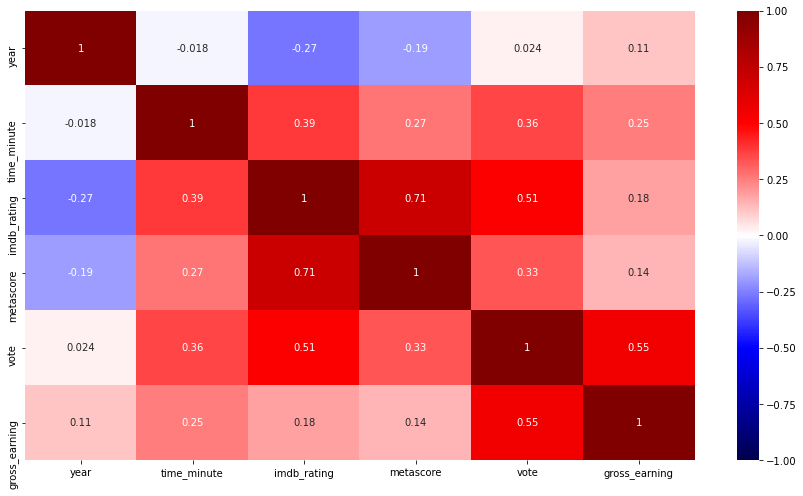

In [41]:
sns.heatmap(df_movies_new.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

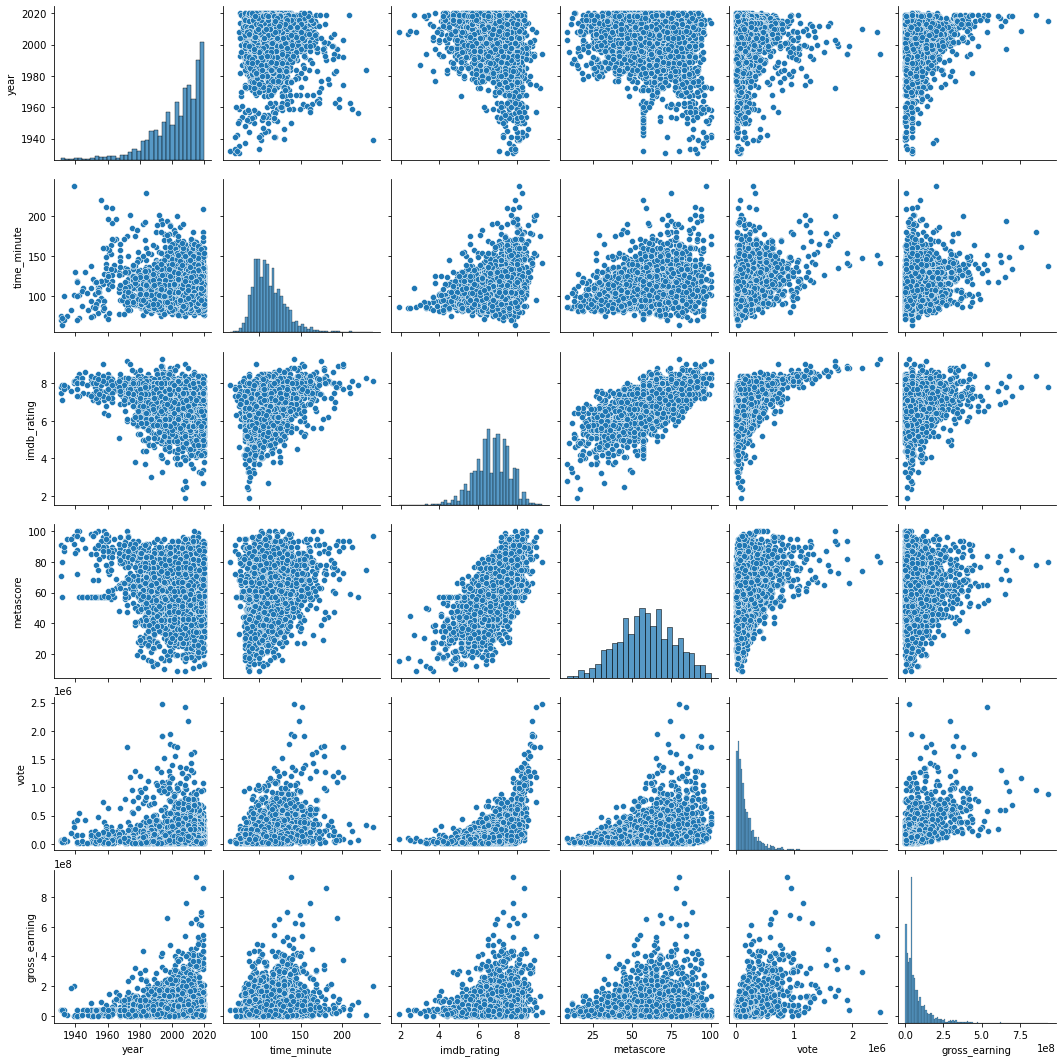

In [42]:
sns.pairplot(df_movies_new)

**Now we will Remove white spaces from columns.**

In [43]:
def strip(names):
    stripped = []
    for name in names:
        stripped.append(name.strip())
    return stripped

In [44]:
df_movies_new.columns = strip(df_movies_new.columns)

***

## Feature Engineering: <a class="anchor" id="Fifth"></a>

### Convert features to Dummy variables: 
    1) Dummy variables for 'certificates'
 

In [45]:
df_movies_new['certificates'] =df_movies_new['certificates'].astype(str).str.replace("Not Rated", "Unrated")
df_movies_new['certificates'].value_counts()

R           1335
PG-13        930
PG           421
G             63
Unrated       54
TV-MA         36
Approved      20
Passed        20
TV-14          7
NC-17          7
GP             4
-              2
TV-PG          2
M/PG           1
M              1
X              1
Name: certificates, dtype: int64

In [46]:
df_movies_new.loc[df_movies_new['certificates'] == '-']

,Movie,year,time_minute,imdb_rating,metascore,vote,gross_earning,certificates,genres
1158,Run Hide Fight,2020,109,6.4,13.0,19392,41435000.0,-,"Crime, Drama, Thriller"
2527,Then Came You,2018,97,7.0,44.0,11538,41435000.0,-,"Adventure, Comedy, Drama"


In [47]:
df_movies_new.drop([1158 , 2527], inplace=True)

In [48]:
df_movies_new['certificates'].value_counts()

R           1335
PG-13        930
PG           421
G             63
Unrated       54
TV-MA         36
Approved      20
Passed        20
TV-14          7
NC-17          7
GP             4
TV-PG          2
M/PG           1
M              1
X              1
Name: certificates, dtype: int64

In [49]:
df_movies_FE = df_movies_new.copy()

df_movies_copy = pd.get_dummies(df_movies_FE['certificates'], drop_first=True)
df_movies_dummy = pd.concat([df_movies_FE, df_movies_copy], axis=1)

df_movies_dummy.head()

,Movie,year,time_minute,imdb_rating,metascore,vote,gross_earning,certificates,genres,G,...,NC-17,PG,PG-13,Passed,R,TV-14,TV-MA,TV-PG,Unrated,X
8,Spectre,2015,148,6.8,60.0,407514,200070000.0,PG-13,"Action, Adventure, Thriller",0,...,0,0,1,0,0,0,0,0,0,0
9,Casino Royale,2006,144,8.0,80.0,613873,167450000.0,PG-13,"Action, Adventure, Thriller",0,...,0,0,1,0,0,0,0,0,0,0
12,The Night House,2020,107,6.5,68.0,14936,41435000.0,R,"Horror, Mystery, Thriller",0,...,0,0,0,0,1,0,0,0,0,0
13,Venom,2018,112,6.7,35.0,414787,213520000.0,PG-13,"Action, Adventure, Sci-Fi",0,...,0,0,1,0,0,0,0,0,0,0
14,Skyfall,2012,143,7.8,81.0,658977,304360000.0,PG-13,"Action, Adventure, Thriller",0,...,0,0,1,0,0,0,0,0,0,0


In [50]:
df_movies_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2902 entries, 8 to 2999
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie          2902 non-null   object 
 1   year           2902 non-null   int64  
 2   time_minute    2902 non-null   int64  
 3   imdb_rating    2902 non-null   float64
 4   metascore      2902 non-null   float64
 5   vote           2902 non-null   int64  
 6   gross_earning  2902 non-null   float64
 7   certificates   2902 non-null   object 
 8   genres         2902 non-null   object 
 9   G              2902 non-null   uint8  
 10  GP             2902 non-null   uint8  
 11  M              2902 non-null   uint8  
 12  M/PG           2902 non-null   uint8  
 13  NC-17          2902 non-null   uint8  
 14  PG             2902 non-null   uint8  
 15  PG-13          2902 non-null   uint8  
 16  Passed         2902 non-null   uint8  
 17  R              2902 non-null   uint8  
 18  TV-14   

### Adding Interaction Terms for features:

    1) Adding Interaction Terms for 'Year'

In [51]:
min_year=df_movies_dummy.year.min()
min_year

1931

In [52]:
#Subtract the min year from each year 
df_movies_dummy['year']=df_movies_dummy.year.sub(min_year)

In [53]:
df_movies_dummy.head()

,Movie,year,time_minute,imdb_rating,metascore,vote,gross_earning,certificates,genres,G,...,NC-17,PG,PG-13,Passed,R,TV-14,TV-MA,TV-PG,Unrated,X
8,Spectre,84,148,6.8,60.0,407514,200070000.0,PG-13,"Action, Adventure, Thriller",0,...,0,0,1,0,0,0,0,0,0,0
9,Casino Royale,75,144,8.0,80.0,613873,167450000.0,PG-13,"Action, Adventure, Thriller",0,...,0,0,1,0,0,0,0,0,0,0
12,The Night House,89,107,6.5,68.0,14936,41435000.0,R,"Horror, Mystery, Thriller",0,...,0,0,0,0,1,0,0,0,0,0
13,Venom,87,112,6.7,35.0,414787,213520000.0,PG-13,"Action, Adventure, Sci-Fi",0,...,0,0,1,0,0,0,0,0,0,0
14,Skyfall,81,143,7.8,81.0,658977,304360000.0,PG-13,"Action, Adventure, Thriller",0,...,0,0,1,0,0,0,0,0,0,0


***

## Linear Regression Models: <a class="anchor" id="sixth"></a>

### Splitting Data:
    1) Data splitting 


> **First, we will make feature selection by dropping categories columns such as "Movie," "genres," and "certificates" before encoding.**

In [54]:
df_movies_edited = df_movies_dummy.loc[:, df_movies_dummy.columns != 'Movie']
df_movies_edited

,year,time_minute,imdb_rating,metascore,vote,gross_earning,certificates,genres,G,GP,...,NC-17,PG,PG-13,Passed,R,TV-14,TV-MA,TV-PG,Unrated,X
8,84,148,6.8,60.0,407514,200070000.0,PG-13,"Action, Adventure, Thriller",0,0,...,0,0,1,0,0,0,0,0,0,0
9,75,144,8.0,80.0,613873,167450000.0,PG-13,"Action, Adventure, Thriller",0,0,...,0,0,1,0,0,0,0,0,0,0
12,89,107,6.5,68.0,14936,41435000.0,R,"Horror, Mystery, Thriller",0,0,...,0,0,0,0,1,0,0,0,0,0
13,87,112,6.7,35.0,414787,213520000.0,PG-13,"Action, Adventure, Sci-Fi",0,0,...,0,0,1,0,0,0,0,0,0,0
14,81,143,7.8,81.0,658977,304360000.0,PG-13,"Action, Adventure, Thriller",0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,80,137,6.5,59.0,125594,37310000.0,R,"Biography, Drama, Romance",0,0,...,0,0,0,0,1,0,0,0,0,0
2996,67,134,7.7,81.0,68481,2810000.0,NC-17,"Comedy, Drama",0,0,...,1,0,0,0,0,0,0,0,0,0
2997,23,105,8.2,75.0,167275,10000.0,PG,"Crime, Thriller",0,0,...,0,1,0,0,0,0,0,0,0,0
2998,79,108,6.3,43.0,143822,80010000.0,PG-13,"Drama, Mystery, Romance",0,0,...,0,0,1,0,0,0,0,0,0,0


In [55]:
df_movies_edited = df_movies_edited.loc[:, df_movies_edited.columns != 'certificates']
df_movies_edited

,year,time_minute,imdb_rating,metascore,vote,gross_earning,genres,G,GP,M,...,NC-17,PG,PG-13,Passed,R,TV-14,TV-MA,TV-PG,Unrated,X
8,84,148,6.8,60.0,407514,200070000.0,"Action, Adventure, Thriller",0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,75,144,8.0,80.0,613873,167450000.0,"Action, Adventure, Thriller",0,0,0,...,0,0,1,0,0,0,0,0,0,0
12,89,107,6.5,68.0,14936,41435000.0,"Horror, Mystery, Thriller",0,0,0,...,0,0,0,0,1,0,0,0,0,0
13,87,112,6.7,35.0,414787,213520000.0,"Action, Adventure, Sci-Fi",0,0,0,...,0,0,1,0,0,0,0,0,0,0
14,81,143,7.8,81.0,658977,304360000.0,"Action, Adventure, Thriller",0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,80,137,6.5,59.0,125594,37310000.0,"Biography, Drama, Romance",0,0,0,...,0,0,0,0,1,0,0,0,0,0
2996,67,134,7.7,81.0,68481,2810000.0,"Comedy, Drama",0,0,0,...,1,0,0,0,0,0,0,0,0,0
2997,23,105,8.2,75.0,167275,10000.0,"Crime, Thriller",0,0,0,...,0,1,0,0,0,0,0,0,0,0
2998,79,108,6.3,43.0,143822,80010000.0,"Drama, Mystery, Romance",0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [56]:
df_movies_edited = df_movies_edited.loc[:, df_movies_edited.columns != 'genres']

In [57]:
df_movies_edited

,year,time_minute,imdb_rating,metascore,vote,gross_earning,G,GP,M,M/PG,NC-17,PG,PG-13,Passed,R,TV-14,TV-MA,TV-PG,Unrated,X
8,84,148,6.8,60.0,407514,200070000.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,75,144,8.0,80.0,613873,167450000.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
12,89,107,6.5,68.0,14936,41435000.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
13,87,112,6.7,35.0,414787,213520000.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
14,81,143,7.8,81.0,658977,304360000.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,80,137,6.5,59.0,125594,37310000.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2996,67,134,7.7,81.0,68481,2810000.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2997,23,105,8.2,75.0,167275,10000.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2998,79,108,6.3,43.0,143822,80010000.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [58]:
# Split into train, val, and test

X = df_movies_edited.drop(['gross_earning'], axis = 1)
y = df_movies_edited['gross_earning']
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=40)




***

### Linear Regression


In [59]:
lr = LinearRegression()
lr.fit(X_train,y_train)

print(f"Training Score: {lr.score(X_train,y_train)}")
print(f"Validation Score: {lr.score(X_val,y_val)}")

Training Score: 0.41084030264989324
Validation Score: 0.40423439582810683


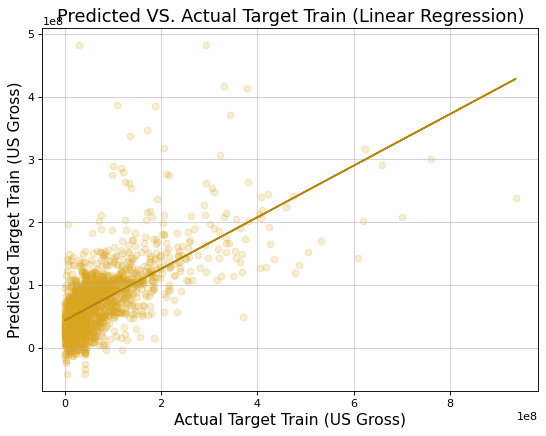

In [60]:
y_train_pred = lr.predict(X_train)
figure(figsize=(8, 6), dpi=80)

plt.scatter(y_train, y_train_pred, alpha=0.2, color='goldenrod')

m, b = np.polyfit(y_train, y_train_pred, 1)
# m = slope 
# b = intercept

plt.plot(y_train, m*y_train + b, color='darkgoldenrod')

plt.xlabel('Actual Target Train (US Gross)', fontsize=14)
plt.ylabel('Predicted Target Train (US Gross)', fontsize=14)
plt.title('Predicted VS. Actual Target Train (Linear Regression)', fontsize=16)
plt.grid(linewidth=0.5)

***

### Experimenting different regressions:

    1. Linear Regression Kfold

In [61]:
def linear_reg_kfold(X_train, y_train):
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 1000)
    #print Training score
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    print(f"Training Score: {round(lm.score(X_train, y_train), 9)}")

    #print Validation score
    valid_scores = cross_val_score(lm, X_train, y_train, cv=kf)
    print(f"Validation Mean Score: {round(np.mean(valid_scores), 9)}")
    return lm

In [62]:
linear_reg_kfold(X_train,y_train)

Training Score: 0.410840303
Validation Mean Score: 0.37299705


LinearRegression()

***

    2. Polynomial Regression of Degree 2

In [63]:
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

poly_model = LinearRegression()

In [64]:
poly_model.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression validation Score: {poly_model.score(X_val_poly, y_val):.8f}')

print(f'Degree 2 polynomial regression training Score: {poly_model.score(X_train_poly, y_train):.8f}')
print(f'Degree 2 polynomial regression testing Score: {poly_model.score(X_test_poly,y_test):.8f}')

Degree 2 polynomial regression validation Score: 0.59439209
Degree 2 polynomial regression training Score: 0.61368493
Degree 2 polynomial regression testing Score: 0.67247905


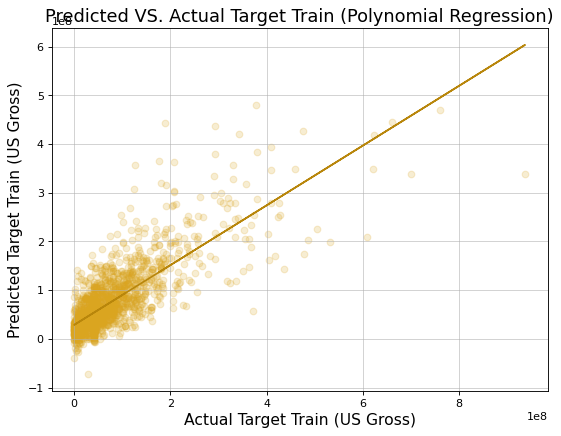

In [65]:
ypoly_train_pred = poly_model.predict(X_train_poly)
figure(figsize=(8, 6), dpi=80)

plt.scatter(y_train, ypoly_train_pred, alpha=0.2, color='goldenrod')

m, b = np.polyfit(y_train, ypoly_train_pred, 1)
# m = slope 
# b = intercept

plt.plot(y_train, m*y_train + b, color='darkgoldenrod')

plt.xlabel('Actual Target Train (US Gross)', fontsize=14)
plt.ylabel('Predicted Target Train (US Gross)', fontsize=14)
plt.title('Predicted VS. Actual Target Train (Polynomial Regression)', fontsize=16)
plt.grid(linewidth=0.5)

***

    3. Ridge Regression

In [66]:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

red_model = Ridge(alpha=1)

In [67]:
red_model.fit(X_train_scaled, y_train)

print(f'Ridge Regression validation Score: {red_model.score(X_val_scaled, y_val):.8f}')
print(f'Ridge Regression Training Score: {red_model.score(X_train_scaled, y_train):.8f}')

Ridge Regression validation Score: 0.40425610
Ridge Regression Training Score: 0.41084005


***

In [68]:
def ridge_model(X_train,y_train, regular_var = 1, CV_flag = False, cv_value = 5, alphavec = [0.1,0.01, 0.001]):
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 1000)
    if CV_flag is True:
        m = RidgeCV(alphas = alphavec, cv = cv_value)
        m.fit(X_train, y_train)
    
        print("Best score:", m.best_score_)
    else:
        m = Ridge(alpha = regular_var) 
        m.fit(X_train, y_train )
        
        valid_scores = cross_val_score(m, X_train, y_train, cv=kf)
        print(f"Training Score: {round(m.score(X_train,y_train), 9)}")
        print(f"Validation Mean Score: {round(np.mean(valid_scores), 9)}")
    return m


In [69]:
ridge_model(X_train, y_train)

Training Score: 0.410668772
Validation Mean Score: 0.3736137


Ridge(alpha=1)

***

    4. Lasso Regression

In [70]:
def lasso_model(X_train,y_train, regular_var = 1, CV_flag = False, cv_value = 5, alphavec = [0.1,0.01, 0.001]):
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 1000)
    if CV_flag is True:
        m = LassoCV(alphas = alphavec, cv = cv_value)
        m.fit(X_train, y_train)
        #print("mean error:", m.mse_path_)
    else:
        m = Lasso(alpha = regular_var, normalize=True, tol=1e-2) 
        m.fit(X_train, y_train )

    valid_scores = cross_val_score(m, X_train, y_train, cv=kf)
    print(f"Training Score: {round(m.score(X_train,y_train), 9)}")
    print(f"Validation Mean Score: {round(np.mean(valid_scores), 9)}")
    return m

In [71]:
lasso_model(X_train, y_train)

Training Score: 0.410840303
Validation Mean Score: 0.372996949


Lasso(alpha=1, normalize=True, tol=0.01)

***

## Conclusion <a class="anchor" id="seventh"></a>

 - **Polynomial Regression of Degree 2 algorithm has the best results.**
 - **Linear Regression, Ridge Regression, Lasso Regression with Cross-Validation has similar scores.**